<a href="https://colab.research.google.com/github/Jobby-John/Titanic1/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [264]:
#importing the dataset
data=pd.read_csv('train.csv')
data.head(5)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [265]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [266]:
data.shape

(891, 12)

In [267]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [269]:
data.nunique()
data.isnull().sum()
data.duplicated().sum()

0

EDA

In [270]:
#First replacing the missing null values in the age column with the mode
mode_value=data['Age'].mode()[0]
mode_value
data['Age'].fillna(mode_value,inplace=True)
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<ipython-input-270-ba5e584600bf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(mode_value,inplace=True)


In [271]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [272]:
mode_value=data['Embarked'].mode()[0]
mode_value
data['Embarked'].fillna(mode_value,inplace=True)
print(data)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<ipython-input-272-e150b8d17d20>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(mode_value,inplace=True)


In [273]:
data['Embarked']=data['Embarked'].map({'S':1, 'Q':2,'C':3})

In [274]:
data.drop('SibSp',axis=1,inplace=True)
data.drop('Parch',axis=1,inplace=True)
data.drop('Cabin',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)


In [275]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [276]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,1
1,2,1,1,female,38.0,71.2833,3
2,3,1,3,female,26.0,7.9250,1
3,4,1,1,female,35.0,53.1000,1
4,5,0,3,male,35.0,8.0500,1


EDA

In [277]:
#we need to check the number of people who survived and those who died
#Then create some charts to show these.
Survived_count=data['Survived'].value_counts()
Survived_count

,count
Survived,
0,549
1,342


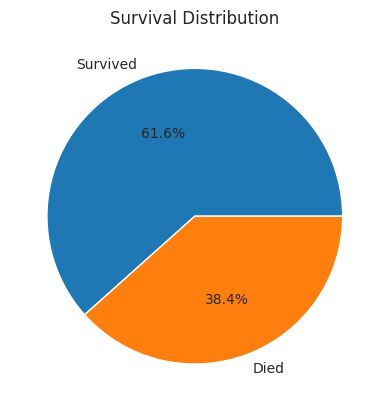

In [278]:
#create a pie chart to show the distribution of those who died and those who survived
plt.pie(Survived_count,labels=['Survived','Died'],autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()

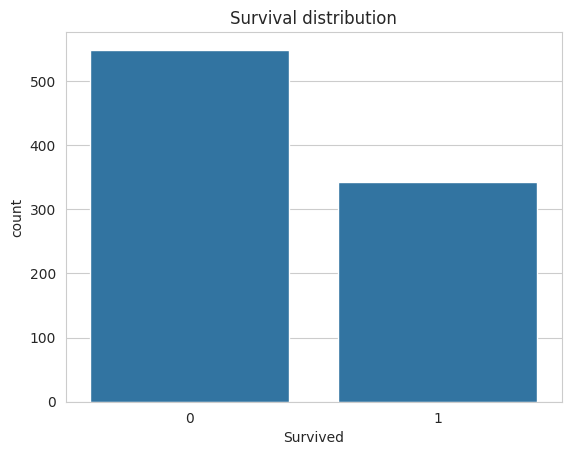

In [279]:
#creating a a vertical histogram to show those who died and those who survived
sns.countplot(x='Survived',data=data)
plt.title('Survival distribution')
plt.show()

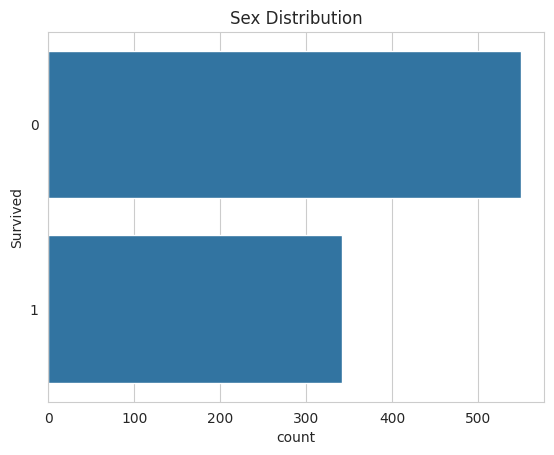

In [280]:
#creating a horizontal bar graph
sns.countplot(y='Survived',data=data)
plt.title('Sex Distribution')
plt.show()

In [281]:
#We need to check the gender distribution of the people aboard the titanic one
gender_count=data['Sex'].value_counts()
gender_count

,count
Sex,
male,577
female,314


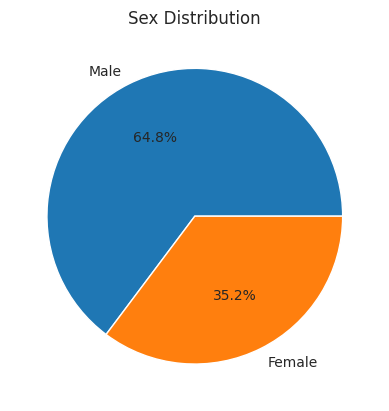

In [282]:
#creating a pie chart to show the distribution of the gender
plt.pie(gender_count,labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

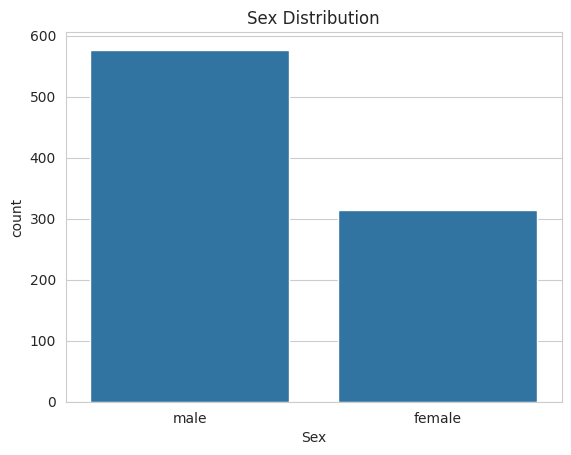

In [283]:
#creating a vertical histogram to show the distribution of the gender
sns.countplot(x='Sex',data=data)
plt.title('Sex Distribution')
plt.show()

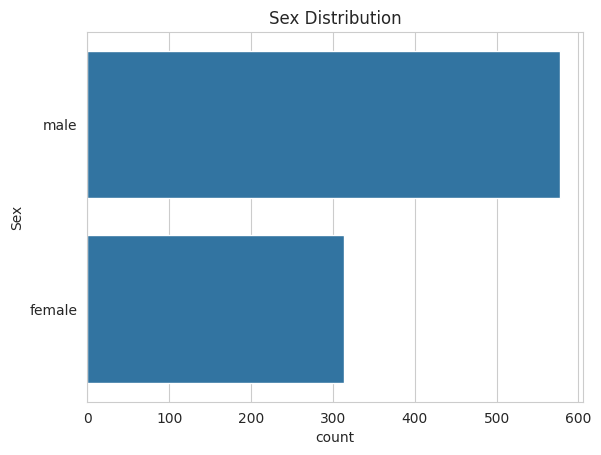

In [284]:
#creating a horizontal histogram to show the distribution of the gender
sns.countplot(y='Sex',data=data)
plt.title('Sex Distribution')
plt.show()

In [285]:
#let us see the distribution of people from the point the embarked the journey
pple_class=data['Embarked'].value_counts()
pple_class

,count
Embarked,
1,646
3,168
2,77


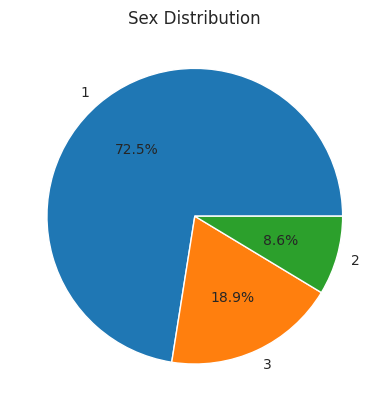

In [286]:
#let us create the piechart for this
plt.pie(pple_class,labels=[1,3,2],autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

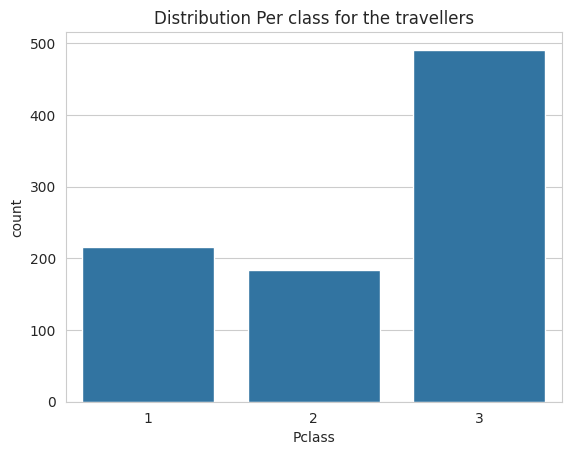

In [287]:
#let us use a histogram to check the distribution
#let us check the distribution of survival rates among the men and women
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=data)
plt.title('Distribution Per class for the travellers')
plt.show()


In [288]:
#let us see the number of people who died from each class
died_data=data[data['Survived']==1]
died_by_class=died_data['Pclass'].value_counts().sort_index
print(died_by_class)

<bound method Series.sort_index of Pclass
1    136
3    119
2     87
Name: count, dtype: int64>


In [289]:
#let us see the number of people who died from each class
survived_data=data[data['Survived']==0]
survived_by_class=survived_data['Pclass'].value_counts()
print(survived_by_class)

Pclass
3    372
2     97
1     80
Name: count, dtype: int64


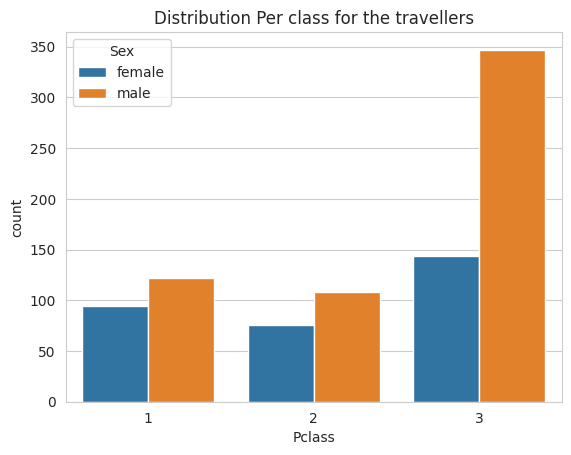

In [290]:
#let us check the distribution of survival rates among the men and women
sns.set_style('whitegrid')
sns.countplot(x='Pclass', hue='Sex', data=data)
plt.title('Distribution Per class for the travellers')
plt.show()

In [291]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


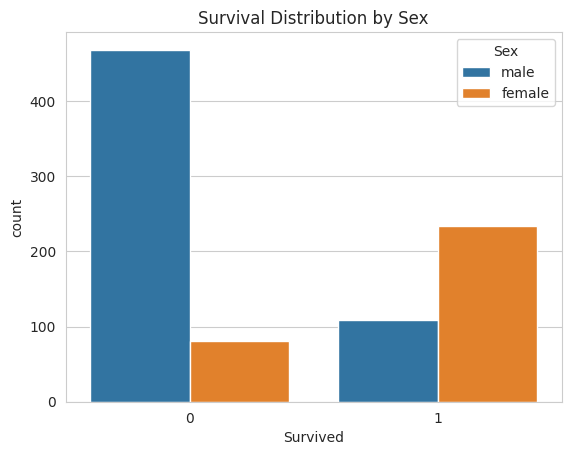

In [292]:
#let us check the distribution of survival rates among the men and women
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Distribution by Sex')
plt.show()

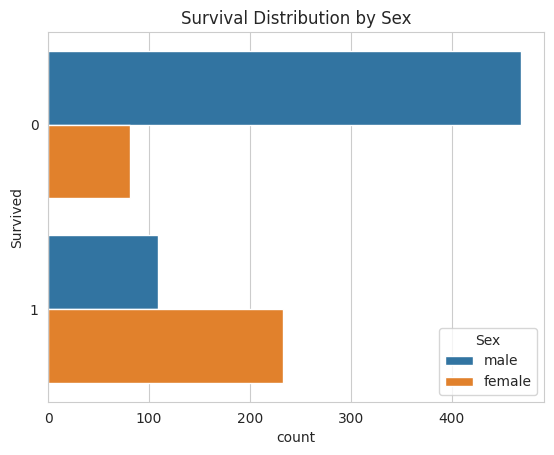

In [293]:
#let us check the distribution of survival rates among the men and women
sns.set_style('whitegrid')
sns.countplot(y='Survived', hue='Sex', data=data)
plt.title('Survival Distribution by Sex')
plt.show()

In [294]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [295]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,1
1,2,1,1,female,38.0,71.2833,3
2,3,1,3,female,26.0,7.9250,1
3,4,1,1,female,35.0,53.1000,1
4,5,0,3,male,35.0,8.0500,1


Logistic regression model

In [296]:
#before proceeding I need to change the string sex into numerical
data['Sex']=data['Sex'].map({'female':0, 'male':1})

In [297]:
data.isnull().sum()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,1
1,2,1,1,0,38.0,71.2833,3
2,3,1,3,0,26.0,7.9250,1
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,1


In [298]:
#we first start by splitting the data into 80-20%
test_features= ['PassengerId','Pclass', 'Age', 'Fare','Sex']
x=data[test_features].values
y=data['Survived'].values
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=40)
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)
y_pred=log_regression.predict(x_test)


In [299]:
print('Accuracy score in percentage:',accuracy_score(y_test,y_pred)*100)
print('Mean Absolute error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Confusion Matrix:',metrics.confusion_matrix(y_test,y_pred))

Accuracy score in percentage: 79.88826815642457
Mean Absolute error 0.2011173184357542
Mean squared error: 0.2011173184357542
Root mean squared error: 0.4484610556511615
Confusion Matrix: [[86 17]
 [19 57]]


In [300]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,1
1,2,1,1,0,38.0,71.2833,3
2,3,1,3,0,26.0,7.9250,1
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,1


In [301]:
#Let us use random forest to create a model that can be used to train this data.
#ADA Boost classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier(RandomForestClassifier(max_depth=5),n_estimators=50,random_state=10)
#fitting the model
ada_boost.fit(x_train,y_train)
pred_ada=ada_boost.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [302]:
print('Accuracy score:',accuracy_score(y_test,pred_ada))
print('Mean Absolute error', metrics.mean_absolute_error(y_test,pred_ada))
print('Mean squared error:', metrics.mean_squared_error(y_test,pred_ada))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,pred_ada)))
print('Confusion Matrix:',metrics.confusion_matrix(y_test,pred_ada))

Accuracy score: 0.8268156424581006
Mean Absolute error 0.17318435754189945
Mean squared error: 0.17318435754189945
Root mean squared error: 0.41615424729527806
Confusion Matrix: [[88 15]
 [16 60]]
